## TIme series analysis

In [1]:
%pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 326.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 798.9 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.4 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/614.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 11.3 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 10.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 9.8 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 9.8 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [5]:
import pandas as pd
df= pd.read_csv('AirPassengers.csv', index_col = 'Month', parse_dates = True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### visualize the time series data

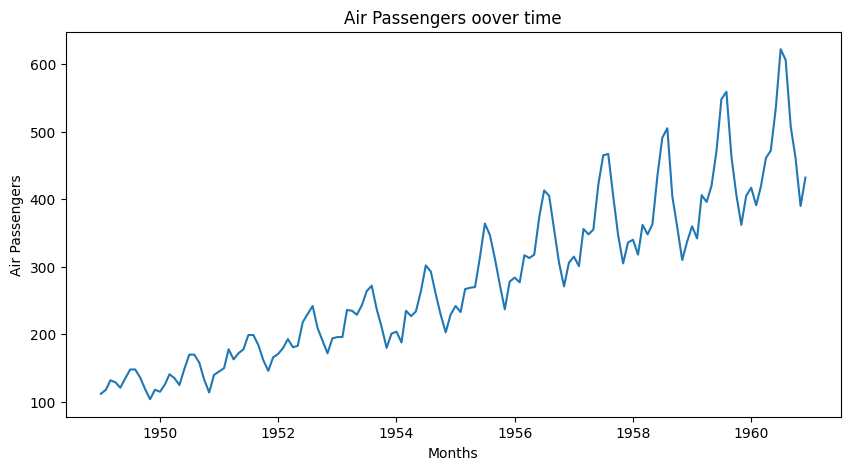

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.plot(df['Passengers'])
plt.xlabel ('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers oover time')
plt.show()

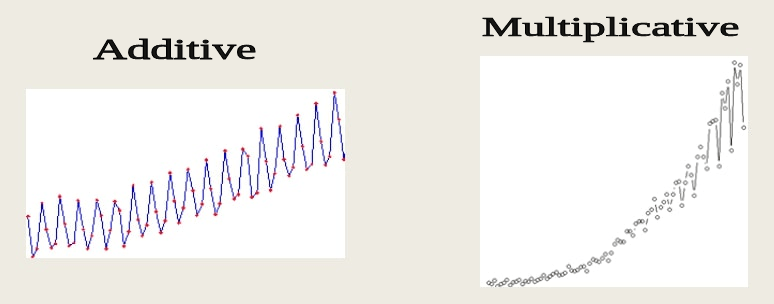

## use multiplicative model for above time series

## Decomposition

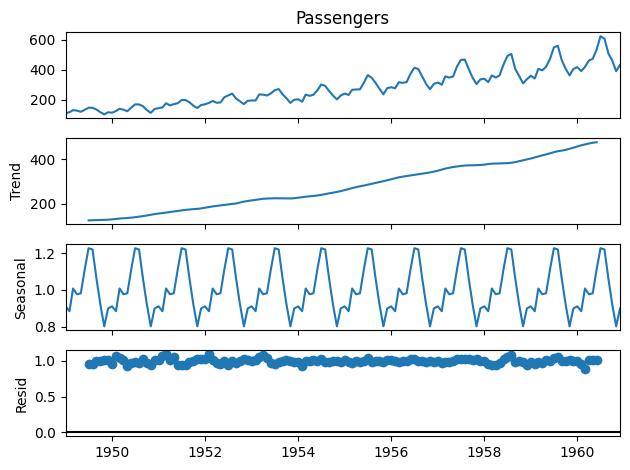

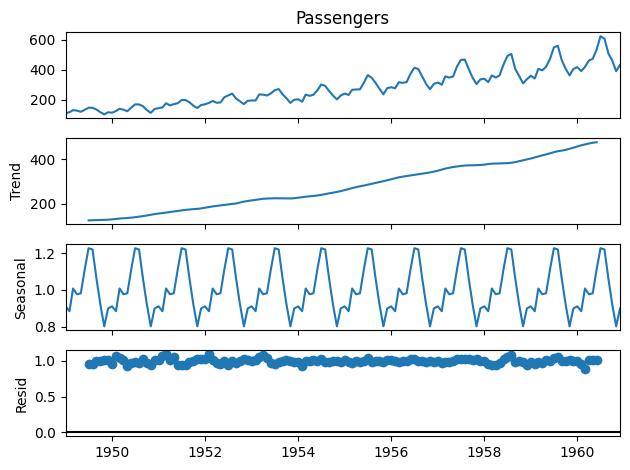

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q  = seasonal_decompose(df['Passengers'], model = 'multiplicative')
Q.plot()

In [11]:
Q.observed

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [12]:
Q.trend[10:]

Month
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
                 ...    
1960-08-01           NaN
1960-09-01           NaN
1960-10-01           NaN
1960-11-01           NaN
1960-12-01           NaN
Name: trend, Length: 134, dtype: float64

In [14]:
Q.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [15]:
Q.resid[10:]

Month
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
                ...   
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01         NaN
Name: resid, Length: 134, dtype: float64

## Trend plot

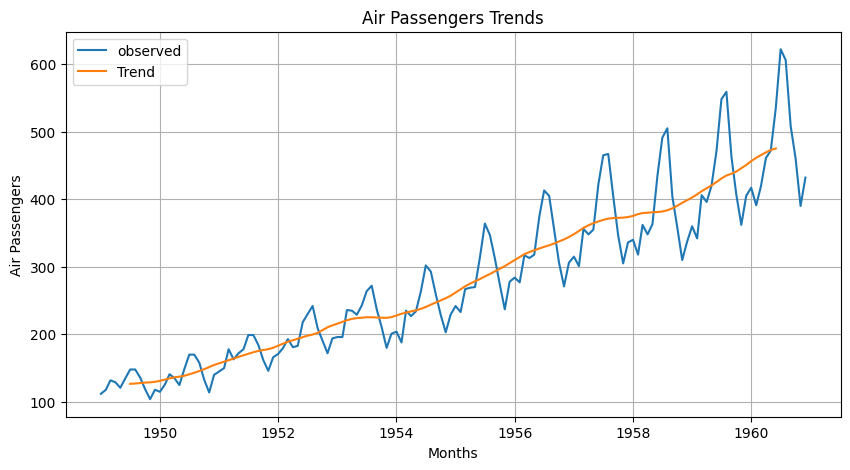

In [16]:
plt.figure(figsize = (10,5))
plt.plot(Q.observed, label = 'observed')
plt.plot(Q.trend, label = 'Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Trends')
plt.legend()
plt.grid()
plt.show()

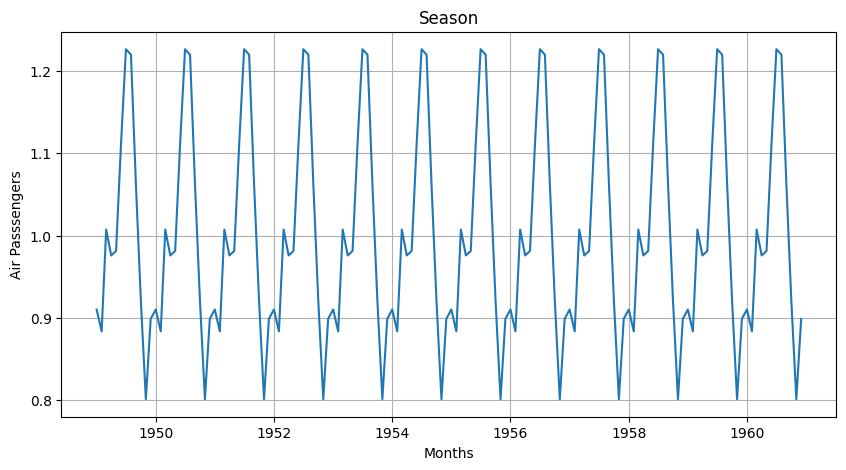

In [17]:
plt.figure(figsize = (10,5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passsengers')
plt.title('Season')
plt.grid()
plt.show()

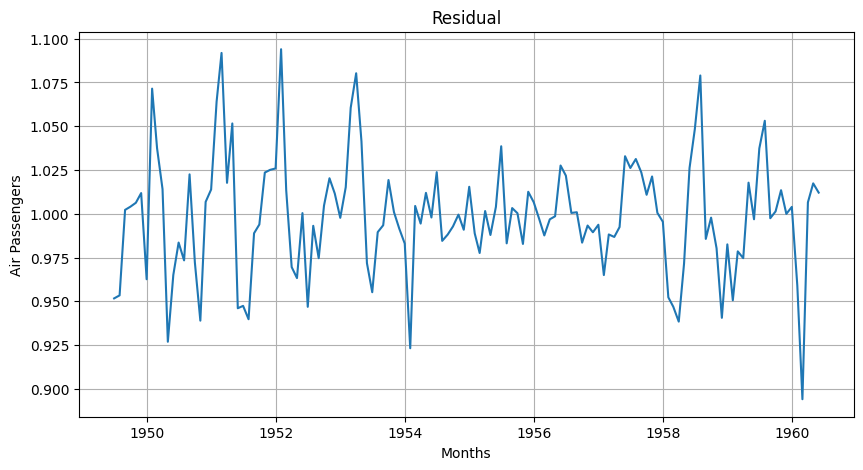

In [18]:
plt.figure(figsize = (10,5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()